In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('winequality-red.csv',sep=";")

In [7]:
df=df.dropna()

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [12]:
df=df.fillna(df.mean())

In [13]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

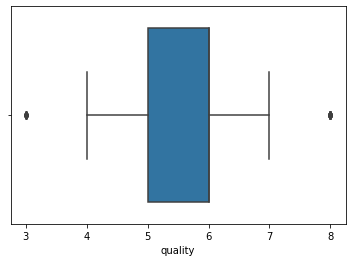

In [23]:
sns.boxplot(df['quality'])

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
minmax_scale = MinMaxScaler().fit(df[['fixed acidity', 'fixed acidity']])
df_minmax = minmax_scale.transform(df[['fixed acidity', 'volatile acidity']])

In [32]:
print('Min-value after normalization:fixed acidity={:.2f}, fixed acidity={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after normalization:fixed acidity={:.2f}, fixed acidity={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after normalization:fixed acidity=0.00, fixed acidity=0.00

Max-value after normalization:fixed acidity=1.00, fixed acidity=1.00


In [39]:
std_scale = StandardScaler().fit(df[['fixed acidity', 'fixed acidity']])
df_std = std_scale.transform(df[['fixed acidity', 'fixed acidity']])
print('Mean after standardization:\nfixed acidity={:.2f}, volatile acidity={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('Standard deviation after standardization:\nfixed acidity={:.2f}, volatile acidity={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
fixed acidity=0.00, volatile acidity=0.00
Standard deviation after standardization:
fixed acidity=1.00, volatile acidity=1.00


In [5]:
x=df['fixed acidity']
y=df['fixed acidity']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (1599, 12)
shape of input - training set (1279,)
shape of output - training set (1279,)
shape of input - testing set (320,)
shape of output - testing set (320,)


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2